In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)

In [10]:

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c1230e5eb0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c1230ae9d0>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [14]:
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
last_date = most_recent_date - dt.timedelta(days=365)
print(last_date)
print(most_recent_date)

2016-08-23
2017-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > last_date).order_by(Measurement.date)

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_scores, columns=['date','precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_values(['date'], ascending=True)

<Figure size 864x720 with 0 Axes>

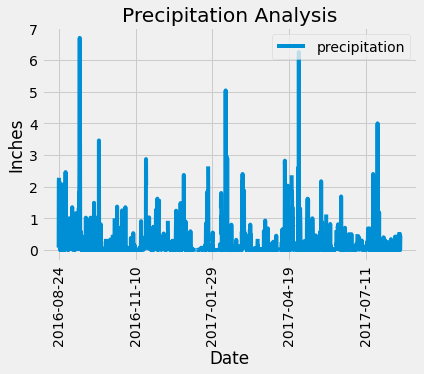

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
dates = df.index.tolist()
prcp = df['precipitation'].tolist()
plt.figure(figsize=(12,10))
df.plot(rot=90)
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Analysis')
plt.savefig('precipitation_date_anlysis.png')

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the datasets
session.query(Station.id).count()

9

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
print(f"Temp Data for 'USC00519281': min: {min_temp}, max: {max_temp}, avg: {avg_temp}.")

Temp Data for 'USC00519281': min: [(54.0,)], max: [(85.0,)], avg: [(71.66378066378067,)].


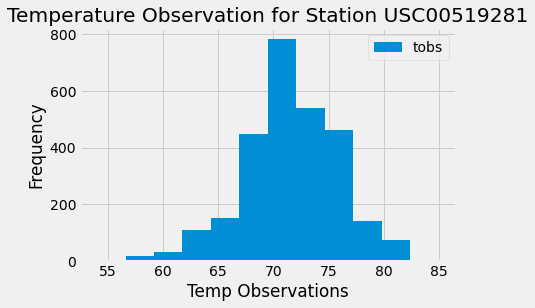

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_top = session.query(Measurement.tobs).\
   filter(Measurement.station == 'USC00519281')
hist_results = pd.DataFrame(temp_data_top)
hist_results.plot.hist(bins=12)
plt.legend(loc='upper right')
plt.xlabel('Temp Observations')
plt.title('Temperature Observation for Station USC00519281')
plt.savefig('temp_obs.png')

# Close session

In [54]:
# Close Session
session.close()